# Lekcja 1. Dokładność obliczeń numerycznych

## Czym są ,,obliczenia numeryczne''?


Zacznijmy od klasycznego przykładu - znajdowanie rozwiazania (pierwiastka) równania $f(x)=0$:

**Ćwiczenie 1.** Znaleźć rozwiązanie równania $3\cdot x^3+2\cdot x^2-1=0$.

Wykonajmy poniższy kod:


In [ ]:
def f(x):
  return 3*x**3+2*x**2-1

a, b = 0, 1
eps = 1e-6
while b - a > eps:
  m = (a + b)/2
  if f(m) == 0:
    break
  else:
    if f(a) * f(m) > 0:
      a=m
    else:
      b=m
print('x = {:.6f}'.format(m))

x = 0.528182


Przeanalizujmy, jak program działa i co konkretnie robi. Po pierwsze - musimy określić, w jakim przedziale będziemy szukać rozwiązania równania. Jeśli podstawimy $x=0$, to lewa strona równania da nam $f(0)=-1$. Analogicznie dla $x=1$ otrzymamy $f(1)=4$. Ponieważ otrzymaliśmy wartości o przeciwnych znakach, to miejsce zerowe (a dokładniej *nieparzysta liczba* miejsc zerowych) musi wystąpić gdzieś pomiędzy powyższymi wartościami $x$. Do znalezienia go użyjemy algorytmu (metody) bisekcji, czyli podziału na pół: znajdujemy środek przedziału, sprawdzamy, czy jest on miejscem zerowym. Jeśli nie, to sprawdzamy, jaki znak ma wartość funkcji w tym punkcie. Jeśli taki sam, jak prawa granica, to wybieramy lewą połowę przedziału, jeśli taki, jak lewa - wybieramy prawą połowę.

Oczywiście taki algorytm będzie działał w nieskończoność (chyba, że mamy szczęście i trafimy dokładnie w miejsce zerowe), dlatego należy zadać pewną **dokładność**, przy której przerwiemy dalsze poszukiwania. W powyższym przykładzie obliczenia przerywamy przy szerokości przedziału $\varepsilon=10^{-6}$ i z taką dokładnością wyświetlamy wynik.

Zauważmy, że w powyższym przykładzie tak naprawdę nie rozwiązaliśmy równania (nie znaleźliśmy rozwiązania analitycznego), ale za pomocą obliczeń na konkretnych wartościach liczbowych znaleźliśmy (przybliżone) rozwiązanie.

Teraz możemy sobie odpowiedzieć na pytanie z tytułu:

**Obliczenia numeryczne** to metoda rozwiązywania problemów matematycznych za pomocą operacji na liczbach. Otrzymane wyniki są przybliżone, ale jesteśmy w stanie zadać dokładność, z jaką wynik powinien być podany.
Można dodać, że obliczenia analityczne są zwykle wykorzystywane przez matematyków lub informatyków przy analizie algorytmów, natomiast obliczenia numeryczne są głównym narzędziem inżynierów.

## Błędy, niedokładności, zaokrąglenia

Skoro obliczenia numeryczne są z definicji niedokładne, to należałoby się zastanowić, jakie są źródła tych niedokładności.

Pierwszym, najbardziej oczywistym jest **niepewność pomiarowa**. Większość wartości, jakimi karmimy nasz komputer, to reprezentacja jakichś wielkości fizycznych z realnego świata - wymiary, masa, temperatura, jasność i kolor światła, głośność i wysokość dźwięku... Wszystkie one muszą być zmierzone, a pomiar jest niedokładny. Tematyka ta jednak wykracza daleko poza zakres naszego kursu, dlatego oprócz zasygnalizowania nie będziemy się nią bliżej zajmować.

Kolejne źródła niedokładności są już ściśle związane ze sposobem, w jaki działa komputer, dlatego omówimy je bardziej szczegółowo.

### Błędy (zaokrąglenia) reprezentacji

Ludzie zapisują liczby najczęściej w reprezentacji pozycyjnej o podstawie $10$. Oznacza to, że wartość liczby zależy od wartości poszczególnych cyfr (od $0$ do $9$) oraz od pozycji, na których te cyfry się znajdują. Cyfra $5$ na ostatniej pozycji ma wartość $5$, ta sama cyfra na pozycji przedostatniej ma wartość $50$ a na pozycji drugiej po przecinku: $0,05$. W ogólności wartość liczby n-cyfrowej możemy zapisać jako $$c_{n-1}\cdot 10^{n-1} + c_{n-2}\cdot 10^{n-2} + \ldots + c_{2}\cdot 10^{2} + c_{1}\cdot 10^{1} + c_{0}\cdot 10^{0}=\Sigma_{i=0}^{n-1} c_i\cdot 10^i$$ Część ułamkową zapisujemy rozszerzając ciąg w prawą stronę, z indeksami i wykładnikami ujemnymi. W przypadku liczb bardzo dużych lub bardzo małych taki zapis jest jednak niezbyt wygodny, gdyż kilka *cyfr znaczących* jest uzupełniane (poprzedzane) przez dużą liczbę zer. W takiej sytuacji wygodniejszy jest zapis wykładniczy, np. liczbę *dwa i pół miliarda* zamiast $2 500000000$ można zapisać jako $2,5\cdot 10^9$ a *jedna dziesięciomilionowa* zamiast $0,0000001$ jako $10^{-7}$. Taki zapis nie tylko zajmuje mniej miejsca, ale jest czytelniejszy. Często stosuje się jeszcze większe uproszczenie (zwane notacją inżynierską), zastępując $\cdot 10^{\square}$ literą **E** lub **e**. Powyższe dwa przykłady zapiszemy odpowiednio jako $2.5\mathrm{E}9$ i $1\mathrm{e}-7$.

Komputer do obliczeń używa reprezentacji binarnej, czyli pozycyjnej o podstawie $2$, gdzie do dyspozycji mamy wyłącznie cyfry $0$ i $1$, a poszczególne pozycje oznaczają odpowiednie potęgi dwójki ($1$, $2$, $4$, $8$, $16$, $\ldots$, a w części ułamkowej $\frac{1}{2}$, $\frac{1}{4}$, $\frac{1}{8}$, $\frac{1}{16}$, $\ldots$). Odpowiednikiem notacji wykładniczej (inżynierskiej) będzie zapis zmiennoprzecinkowy zgodny ze standardem [IEEE 754](https://en.wikipedia.org/wiki/IEEE_754). Np. *liczba 32-bitowa* (pojedynczej precyzji) zgodnie z tym standardem jest zapisywana jako:

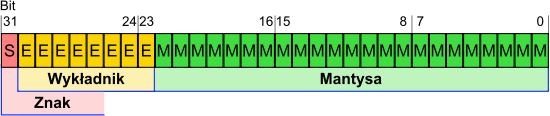  

gdzie najstarszy bit (MSB) koduje znak liczby ($0$ dla liczb dodatnich i $1$ dla ujemnych), kolejnych $8$ bitów koduje wykładnik, czyli *cechę* (w zapisie z przesunięciem o $127$, pozwalającym zapisywać liczby z zakresu od $-126$ do $127$) a pozostałe $23$ bity służą do zapisania ułamkowej części cyfr znaczących, czyli *mantysę*. Łatwo możemy obliczyć, że mantysa liczby 32-bitowej może przechować ok. 7 cyfr znaczących liczby dziesiętnej.

Z drugiej strony przeliczenie ułamka dziesiętnego na binarny jest zwykle ułamkiem nieskończonym, więc przeliczenie należy obciąć lub zaokrąglić po osiągnięciu limitu bitów. Tak więc pierwszym źródłem niedokładności są **zaokrąglenia przekształcenia liczby dziesiętnej na binarną zmiennoprzecinkową**.

### Dokładność operacji arytmetycznych

Kolejne problemy pojawiają się, jeśli spróbujemy przeprowadzić operacje arytmetyczne na tak zapisanych liczbach. Mnożenie i dzielenie liczb zmiennoprzecinkowych polega na mnożeniu (dzieleniu) mantys i dodaniu (odjęciu) wykładników - łatwo może się zdarzyć, że w przypadku bardzo dużych lub małych wykładników ich suma (różnica) przekroczy dostępny zakres. W takim wypadku mówimy o błędzie przepełnienia lub niedoboru, ale python potrafi sobie z nimi poradzić i wynik zostanie przedstawiony jako nieskończoność lub zero. Sprawdźmy powyższe na przykładzie:

In [ ]:
print(1e180 * 1e128)
print(1e180 * 2e128)
print(1e-180 / 1e143)
print(1e-180 / 5e143)

1e+308
inf
1e-323
0.0


Większym problemem są operacje na liczbach całkowitych w pakietach numerycznych takich jak `numpy` lub `pandas` - tam przepełnienie może spowodować zmianę znaku wyniku i całkowicie błędny rezultat:


In [ ]:
import numpy as np
a = np.array([2**63 - 1], dtype=int)
print(a)
print(a+1)

[9223372036854775807]
[-9223372036854775808]


Jeszcze ciekawsze są operacje dodawania i odejmowania, ponieważ tam niedokładności bardzo szybko się propagują. Spróbujmy dodać dwie całkiem zwyczajne liczby:

In [ ]:
print(0.1)
print(0.2)
print(0.1 + 0.2)

0.1
0.2
0.30000000000000004


Dodawanie (odejmowanie) liczb zmiennoprzecinkowych jest operacją dość skomplikowaną - wymaga wcześniejszego uzgodnienia (zrównania) wykładników, co wiąże się z przemnożeniem lub podzieleniem mantysy jednej z liczb. W algorytmach wbudowanych w języki programowania to druga i kolejne liczby są normalizowane do pierwszej, w związku z czym wynik dodawania może zależeć od tego, w jakiej kolejności dodajemy liczby. Prześledźmy to na poniższym przykładzie - dodajmy kilkakrotnie małą liczbę do jedynki, a następnie zamieńmy kolejność:

In [ ]:
a=1.0 + 1e-16 + 1e-16 + 1e-16 + 1e-16 + 1e-16
b=1e-16 + 1e-16 + 1e-16 + 1e-16 + 1e-16 + 1.0
print("a= {}, b={}, a-b={}".format(a, b, b-a))

a= 1.0, b=1.0000000000000004, a-b=4.440892098500626e-16


Najważniejszym wnioskiem z powyższego jest fakt,  że nawet jeśli poszczególne argumenty wyrażone są dokładnie to nie jest pewne, że wynik działania również będzie dokładny. Drugą konsekwencją jest zjawisko **niestabilności numerycznej**. Pojawia się ona wtedy, gdy mały błąd numeryczny w trakcie dalszych obliczeń przemnaża się i w konsekwencji powoduje duży błąd wyniku.
Spróbujmy wykonać wielokrotne dodawanie i odejmowanie i zobaczmy, jak to wpłynie na wynik:

In [ ]:
def add_and_subtract(iterations):
    result = 1
    
    for i in range(iterations):
        result += 1/3

    for i in range(iterations):
        result -= 1/3
    return result

# tylko raz:
print(" Jeden raz:",add_and_subtract(1))

# 100 razy:
print("  100 razy:", add_and_subtract(100))

# 10000 razy:

print("10000 razy:",add_and_subtract(10000))


 Jeden raz: 1.0
  100 razy: 1.0000000000000002
10000 razy: 1.0000000000001166


### Wartość graniczna i błędy odcięcia

Przy analizie przykładu zauważyliśmy, że algorytm obliczenia pierwiastka równania może wykonywać się w nieskończoność. Należy go sztucznie ograniczyć, zakładając pewną wartość graniczną dokładności. Innym przykładem takiego arbitralnego ograniczenia jest obliczanie sumy (albo rozwinięcia) nieskończonego szeregu - oczywiście obliczenia należy ograniczyć do skończonej liczby składników. Niedokładności wprowadzane w ten sposób nazywane są błędami oddcięcia. Dobra wiadomość jest taka, że zwykle sami jesteśmy w stanie określić, jak duże powinny one być, zawsze jest to wynik kompromisu pomiędzy wymaganą precyzją wyniku a zużyciem zasobów (czasu i pamięci) do obliczenia tego wyniku.

# Podsumowanie

1. Liczby są przedstawiane za pomocą reprezentacji. Każda reprezentacja ma pewne wady i zalety.
1. Komputery używają reprezentacji binarnej na ograniczonej liczbie bitów, co powoduje błędy, które się mogą kumulować.
1. Błędy i zaokrąglenia są istotnym i nierozłącznym elementem obliczeń numerycznych i należy je zawsze brać pod uwagę.